# **Fraudes em Cartões de Crédito**

# 1. Análise de Fraudes com Cartões de Crédito:

## 1.1. Motivação:

Com a pandemia de COVID-19 se alastrando pelo mundo no começo de 2020, o mundo foi forçado a aderir aos *lockdowns*. Com isso, houve um aumento significativo de compras online [1, 2], sendo o cartão de crédito a forma preferida de pagamento, correspondendo a 93% em alguns segmentos de compras [3], no Brasil.

Mesmo com a flexibilização e abandono da quarentena, pesquisas apontam que o hábito de comprar online aumenta a cada dia, com o Brasil liderando o *ranking* de crescimento (pouco mais de 22%) [4].

Dessa forma, aumentam também os tipos de fraudes para essa forma de pagamento, gerando prejuízos aos consumidores e custos para os bancos. De acordo com um levantamento da IBM, o Brasil é o terceiro país que mais sofreu com esse tipo de prática [5], onde 1 em cada 3 consumidores foi alvo.

Portanto, faz-se necessário um estudo mais aprofundado no entendimento desse tipo de fraude: quais parâmetros impedem/diminuem as fraudes, como evitar novos “golpes” e como melhorar a segurança nas compras.


## 1.2. Objetivo:

O objetivo deste trabalho é analisar os dados de compras com cartões de crédito, dados estes compostos em fraudes e compras verificadas.

Primeiramente, será feita a análise exploratória dos dados (EDA) para conhecimento e análises preliminares do conjunto, e em seguida, serão testados modelos de classificação e predição.

## 1.3. Abordagem do Problema:

O estudo de fraudes em cartões de crédito vem aumentando após o crescimento da Ciência de Dados, na qual permite uma avaliação mais assertiva da situação, quando bem analisada. Esta análise é de vital importância para entendimento do problema, bem como de suas possíveis limitações, evitando problemas posteriores nos treinamento dos modelos de Machine Learning desejados.

Portanto, essa é uma área com várias referências na literatura, com grupos tentando cada vez mais melhorar a acurácia dos modelos defendidos.

Como a maior parte destes grupos está focado na melhora da acurácia, é raro encontrar algum artigo que apresenta a análise exploratória dos dados, partindo diretamente para os modelos em si. Provavelmente, isso é feito para poupar tempo do leitor (que deve ter o mínimo conhecimento nessas análises), além de manter o foco no assunto de interesse. Ou seja, desenvolver formas de solucionar alguns problemas presentes nos dados disponíveis: normalmente  a base de dados é desbalanceada, podendo acarretar em treinamentos com baixa performance; falta de dados para o estudo dos fatores principais que acarretam nas fraudes; e dados sensíveis, que violem leis de privacidade, como a LGPD.

Entre os modelos apresentados em alguns artigos estudados, pode-se citar o LOF (Local Outlier Factor), a DT (Decision Tree), o SVM e a Regressão Logística [6, 7, 8]. Estes métodos de Machine Learning serão abordados na seção 3.

Uma vez que a base de dados escolhida está disponível no *Kaggle*, facilmente encontra-se trabalhos com a mesma proposta ou proposta similar à desenvolvida neste trabalho.

Apesar de ser uma base de dados simples, com poucas features, seu estudo pode ser bastante abrangente, servindo no estudo de EDA e na predição de modelos clássicos. Além disso, trata-se de um *dataset* atualizado, sendo sua última modificação em Maio de 2022 e não possui dados sensíveis. Deste modo, é um arquivo que já possui algumas modificações quanto às compras feitas *online*. A seguir, tem-se alguns trabalhos que utilizam a mesma base de dados e seguem uma linha similar:

  1. Um dos *notebooks* que utiliza a mesma base de dados, faz em poucas células, uma breve análise exploratória de dados, obtendo dados descritivos, correlação entre as *features* e alguns gráficos. Em seguida, faz um treinamento para a Regressão Logística, analisando apenas os dados da *feature* de fraudes. Infelizmente, o usuário não adequou o *dataset* corretamente, uma vez que as fraudes correspondem a menos de 10% dos dados. Isso fez com que o modelo treinado reconhecesse as transações apenas como não fraudulentas (https://www.kaggle.com/code/boikanyobk/credit-card-fraud-detection).

  2. Já o segundo notebook estudado, faz pouquíssimas análises de EDA, mantendo seu foco na classificação de modelos. Diferentemente do primeiro *notebook* estudado, este usuário verificou que o *dataset* é desbalanceado e fez as alterações necessárias para evitar baixa performance (o usuário fez uso do método SMOTE()). Neste caso, o usuário fez uso da Classificação Binária, usando uma rede neural com três camadas (https://www.kaggle.com/code/bahadoreizadkhah/credit-card-fraud-classification-with-pytorch/notebook).

  3. Por fim, o último *notebook* estudado também faz uma breve análise de EDA, porém, vê-se que o usuário já possui maior experiência, uma vez que suas análises são mais assertivas e diretas ao estudo proposto: são gerados gráficos de distribuições bivariadas (com o método pairplot() do Seaborn) e gráficos de violino para análise de fraude em diferentes tipos de transação. Após várias análises, são treinados e testados três modelos: DNN, SVM e Árvore de Decisão 	(https://www.kaggle.com/code/zwhjorth/dnn-svm-and-dt-for-fraud-detection/notebook).

Para o atual trabalho, serão analisados três modelos, dois abordados nos *notebooks* citados (a Regressão Logística - primeiro *notebook*; e Árvore de Decisão - último *notebook*) e o KNN. A fim de comparação, serão reanalisados os modelos com o uso do SMOTE (usado no segundo *notebook*).

# 2. EDA (Análise Exploratória de Dados):

## 2.1. Features:

As features do dataset usado são:


*distancefromhome* - a distância entre a moradia e o estabelecimento onde ocorreu a transação. (the distance from home where the transaction happened.)

*distancefromlast_transaction* - distância da última transação efetuada (the distance from last transaction happened.)

*ratiotomedianpurchaseprice* - razão entre o preço de compra por transação e o preço de compra mediano. (Ratio of purchased price transaction to median purchase price.)

*repeat_retailer* - se a transação ocorreu no mesmo estabelecimento. (Is the transaction happened from same retailer.)

*used_chip* - se a transação foi feita através do *chip*. (Is the transaction through chip (credit card).)

*usedpinnumber* - se a transação foi feita com o *PIN number*. (Is the transaction happened by using PIN number.)

*online_order* - se a transação foi *online*. (Is the transaction an online order.)

*fraud* - se a transação é fraudulenta. (Is the transaction fraudulent.)

*Obs*.: Algumas colunas usam lógica *booleana*, valendo a seguinte correspondência:

*   0: não;
*   1: sim.

## 2.2. Montagem do Ambiente e Carregamento do DataSet:

In [ ]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

A base de dados usada neste trabalho foi baixada do *Kaggle*. O link para *download* encontra-se em:

https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud?resource=download

In [ ]:
# Carregando o dataset (salvo no meu drive)
df = pd.read_csv('/content/drive/MyDrive/Ciência de Dados/card_transdata.csv')

## 2.3. Visualização dos Dados e Primeiras Análises:

In [ ]:
# Visualização prévia dos dados
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
# Dados do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


Analisando os dados apresentados acima, é possível verificar que o *dataframe* (df) usado não possui valores nulos em nenhuma das colunas.

Vamos agora verificar se há duplicatas:

In [ ]:
# Verificação de duplicatas
df.nunique()

distance_from_home                1000000
distance_from_last_transaction    1000000
ratio_to_median_purchase_price    1000000
repeat_retailer                         2
used_chip                               2
used_pin_number                         2
online_order                            2
fraud                                   2
dtype: int64

É possível verificar que não há duplicatas neste *dataframe*, uma vez que as colunas "*distance_from_home*", "*distance_from_last_transaction*" e "*ratio_to_median_purchase_price*" possuem todos os valores distintos. Logo, nosso *dataframe* não possui duplicatas e nem valores *NaN*.

Continuando, será feita uma breve análise estatística dos dados.

In [ ]:
# Descrição Estatística
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


Após breve análise, é possível notar que:


*   A maioria das compras foram feitas com o mesmo vendedor/loja;
*   Mais de 75% das compras foram feitas sem o uso do *PIN number*;
*   Mais de 50% das compras não foram feitas usando o *chip*;
*   Parece que há balanceamento entre as compras feitas *online* e nas lojas físicas;
*   Há mais de 75% de compras não fraudulentas neste *dataset*.

A correlação das *features* pode ser visualizada através da tabela ou de um *heatmap*:

In [ ]:
# Correlação entre as Features
df.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


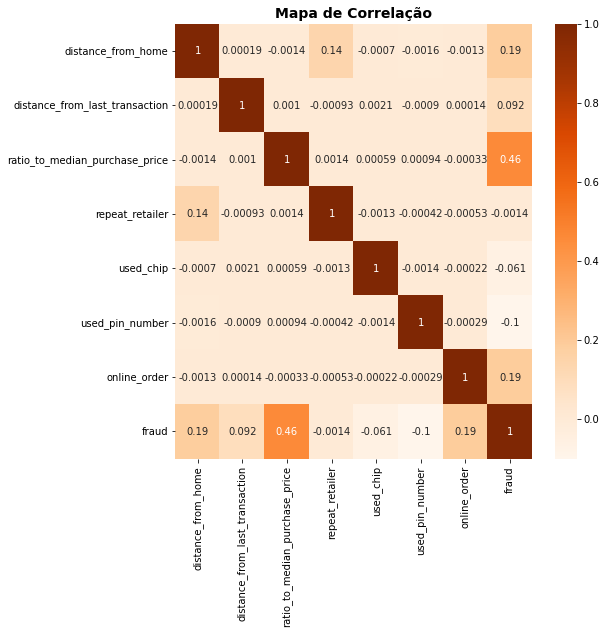

In [ ]:
# Heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap='Oranges')
plt.title('Mapa de Correlação', size=14, weight='bold')
plt.show()

É possível verificar que a *feature* "*fraud*" possui a maior correlação com "*ratio_to_median_purchase_price*", uma vez que seu valor foi o mais próximo de 1.

Antes de serem apresentados mais alguns gráficos, serão calculados alguns valores:

In [ ]:
# Cálculo da quantidade (valores reais e porcentagem) de compra com mesmo vendedor
# Valores
num_repr = len(df[df['repeat_retailer'] == 1])
num_nrepr = len(df[df['repeat_retailer'] == 0])

# Porcentagens
p_repr = (num_repr*100/len(df))
p_nrepr = (num_nrepr*100/len(df))

# Saída
print('\tInformações Preliminares - Vendedor')
print('-'*60)
print('Mesmo Vendedor?\t\tQuantidade:\tPorcentagem:')
print('-'*60)
print('Sim\t\t\t',num_repr,'\t',p_repr,'%')
print('Não\t\t\t',num_nrepr,'\t',p_nrepr,'%')

	Informações Preliminares - Vendedor
------------------------------------------------------------
Mesmo Vendedor?		Quantidade:	Porcentagem:
------------------------------------------------------------
Sim			 881536 	 88.1536 %
Não			 118464 	 11.8464 %


In [ ]:
# Cálculo da quantidade (valores reais e porcentagem) de compra com chip
# Valores
num_chip = len(df[df['used_chip'] == 1])
num_nchip = len(df[df['used_chip'] == 0])

# Porcentagens
p_chip = (num_chip*100/len(df))
p_nchip = (num_nchip*100/len(df))

# Saída
print('    Informações Preliminares - Tipo de Cartão')
print('-'*50)
print('Chip?\t\tQuantidade:\tPorcentagem:')
print('-'*50)
print('Sim\t\t',num_chip,'\t',p_chip,'%')
print('Não\t\t',num_nchip,'\t',p_nchip,'%')

    Informações Preliminares - Tipo de Cartão
--------------------------------------------------
Chip?		Quantidade:	Porcentagem:
--------------------------------------------------
Sim		 350399 	 35.0399 %
Não		 649601 	 64.9601 %


In [ ]:
# Cálculo da quantidade (valores reais e porcentagem) de compra com PIN
# Valores
num_pin = len(df[df['used_pin_number'] == 1])
num_npin = len(df[df['used_pin_number'] == 0])

# Porcentagens
p_pin = (num_pin*100/len(df))
p_npin = (num_npin*100/len(df))

# Saída
print('\tInformações Preliminares - PIN Number')
print('-'*50)
print('PIN?\t\tQuantidade:\tPorcentagem:')
print('-'*50)
print('Sim\t\t',num_pin,'\t',p_pin,'%')
print('Não\t\t',num_npin,'\t',p_npin,'%')

	Informações Preliminares - PIN Number
--------------------------------------------------
PIN?		Quantidade:	Porcentagem:
--------------------------------------------------
Sim		 100608 	 10.0608 %
Não		 899392 	 89.9392 %


In [ ]:
# Cálculo da quantidade (valores reais e porcentagem) de compras online
# Valores
num_onl = len(df[df['online_order'] == 1])
num_nonl = len(df[df['online_order'] == 0])

# Porcentagens
p_onl = (num_onl*100/len(df))
p_nonl = (num_nonl*100/len(df))

# Saída
print('\tInformações Preliminares - Tipo de Venda')
print('-'*50)
print('Online?\t\tQuantidade:\tPorcentagem:')
print('-'*50)
print('Sim\t\t',num_onl,'\t',p_onl,'%')
print('Não\t\t',num_nonl,'\t',p_nonl,'%')

	Informações Preliminares - Tipo de Venda
--------------------------------------------------
Online?		Quantidade:	Porcentagem:
--------------------------------------------------
Sim		 650552 	 65.0552 %
Não		 349448 	 34.9448 %


In [ ]:
# Cálculo da quantidade (valores reais e porcentagem) de fraudes
# Valores
num_fraud = len(df[df['fraud'] == 1])
num_nfraud = len(df[df['fraud'] == 0])

# Porcentagens
p_fraud = (num_fraud*100/len(df))
p_nfraud = (num_nfraud*100/len(df))

# Saída
print('\tInformações Preliminares - Fraudes')
print('-'*50)
print('Tipo:\t\tQuantidade:\tPorcentagem:')
print('-'*50)
print('Compra\t\t',num_nfraud,'\t',p_nfraud,'%')
print('Fraude\t\t',num_fraud,'\t\t',p_fraud,'%')

	Informações Preliminares - Fraudes
--------------------------------------------------
Tipo:		Quantidade:	Porcentagem:
--------------------------------------------------
Compra		 912597 	 91.2597 %
Fraude		 87403 		 8.7403 %


Primeiramente, serão analisados os dados relativos à fraude:

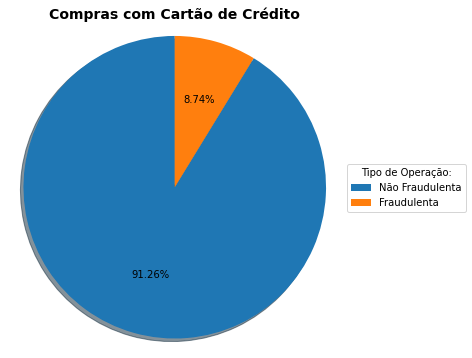

In [ ]:
# Gráfico de Pizza - Quantidade de fraudes
labels = ['Não Fraudulenta','Fraudulenta']
sizes = [num_nfraud, num_fraud]

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, autopct='%1.2f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.legend(labels, title='Tipo de Operação:', loc='center left', bbox_to_anchor=(1,0,0.5,1))
ax1.set_title('Compras com Cartão de Crédito', size=14, weight='bold')
plt.show()

É possível observar pelo gráfico (anteriormente) que o *dataset* usado neste trabalho está desbalanceado. Para a primeira parte do trabalho, onde serão feitas apenas as análises preliminares, isso não será um problema.

Porém, para a segunda parte, deverão ser feitas algumas abordagens para evitar que os modelos treinados gerem falsas previsões.

Plotando os gráficos de algumas *features*, é possível verificar os dados obtidos através do método *describe()*.

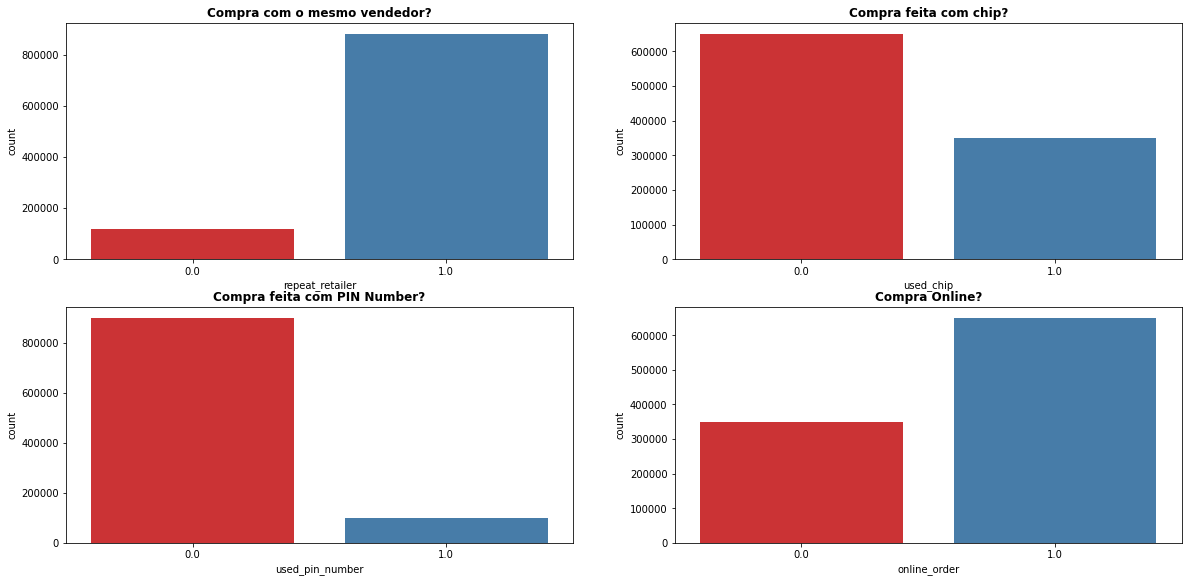

In [ ]:
# Comparação entre Features - Análise Quantitativa
plt.figure(figsize=(20,20))

plt.subplot(4,2,1)
sns.countplot(x='repeat_retailer', palette='Set1', data=df)
plt.title('Compra com o mesmo vendedor?', size=12, weight='bold')

plt.subplot(4,2,2)
sns.countplot(data=df, x='used_chip', palette='Set1')
plt.title('Compra feita com chip?', size=12, weight='bold')

plt.subplot(4,2,3)
sns.countplot(data=df, x='used_pin_number', palette='Set1')
plt.title('Compra feita com PIN Number?', size=12, weight='bold')

plt.subplot(4,2,4)
sns.countplot(data=df, x='online_order', palette='Set1')
plt.title('Compra Online?', size=12, weight='bold')

plt.show()

Agora, serão analisados os dados correspondentes apenas às compras *online*.

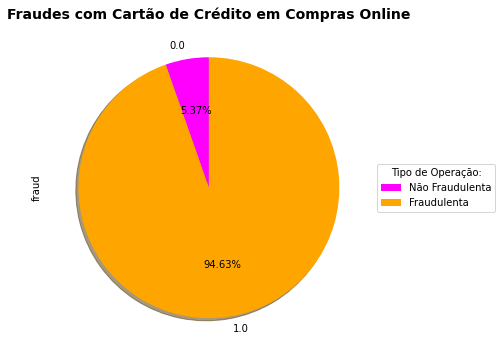

In [ ]:
# Gráfico de Pizza - Quantidade de Fraudes em Compras Online
plt.figure(figsize=(6,6))
labels = ['Não Fraudulenta', 'Fraudulenta']
colors = ['magenta', 'orange']

df.groupby('online_order')['fraud'].sum().plot(kind='pie', autopct='%1.2f%%', colors=colors, shadow=True, startangle=90)
plt.title('Fraudes com Cartão de Crédito em Compras Online', size=14, weight='bold')
plt.legend(labels, title='Tipo de Operação:', loc='center left', bbox_to_anchor=(1,0,0.5,1))
plt.show()

Nota-se que, quando analisadas apenas as compras feitas *online*, a quantidade de fraudes é ainda menor se comparada aos dados totais.

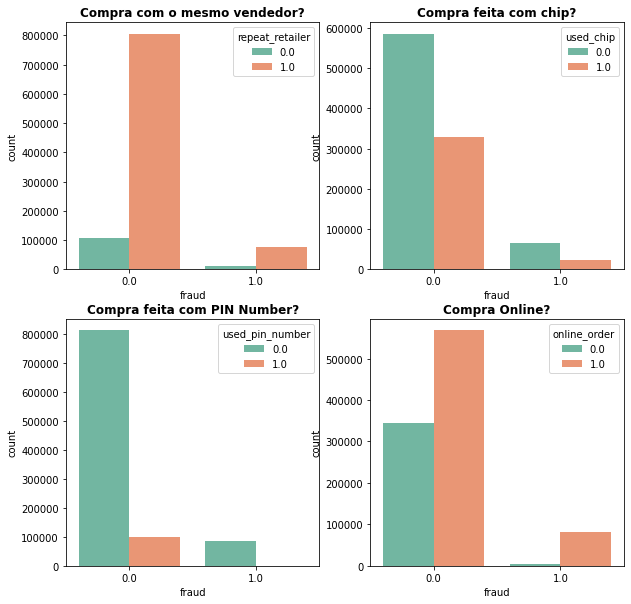

In [ ]:
# Comparação entre Features - Análise Quantitativa
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
sns.countplot(x='fraud', hue='repeat_retailer', palette='Set2', data=df)
plt.title('Compra com o mesmo vendedor?', size=12, weight='bold')

plt.subplot(2,2,2)
sns.countplot(x='fraud', hue='used_chip', palette='Set2', data=df)
plt.title('Compra feita com chip?', size=12, weight='bold')

plt.subplot(2,2,3)
sns.countplot(x='fraud', hue='used_pin_number', palette='Set2', data=df)
plt.title('Compra feita com PIN Number?', size=12, weight='bold')

plt.subplot(2,2,4)
sns.countplot(x='fraud', hue='online_order', palette='Set2', data=df)
plt.title('Compra Online?', size=12, weight='bold')

plt.show()

Após breve comparação entre os dados totais e os dados referente às compras *online*, nota-se:


*   Há mais fraudes nas compras *online* com o mesmo vendedor;
*   As fraudes *online* ocorrem mais com consumidores que não usaram o *PIN Number* e nem o *chip*;



Após este breve estudo, serão estudados e treinados alguns modelos.

# 3. Modelos de Machine Learning:

Para a análise de modelos de *Machine Learning*, serão analisados os dados de fraudes. Para tal, o *dataset* será dividido em dois, de forma que uma parte (70%) seja usado no treinamento, e o restante (30%) seja usado nos testes.

In [ ]:
# Importando novas bibliotecas
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

## 3.1. Análise Desbalanceada:

Nos dois primeiros *notebooks* analisados, os usuários treinaram seus modelos sem fazer qualquer tratamento de balanceamento dos dados. Nesta seção, faremos análises similares.

In [ ]:
# Dividindo o df
input_cols = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price',
              'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']
target_col = 'fraud'

In [ ]:
# Definindo os dados de treinamento (70%) e de teste (30%)
train_x, test_x, train_y, test_y = train_test_split(df[input_cols], df[target_col], random_state=42, test_size = 0.3)

### 3.1.1. Modelo de Regressão Logística:

In [ ]:
# Regressão Logística
lr = LogisticRegression()
lr.fit(train_x, train_y)

# Saída
print(classification_report(test_y, lr.predict(test_x)))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273871
         1.0       0.89      0.60      0.71     26129

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.95    300000



Para a Regressão Logística, temos precisão de 96% e 99% de *recall* para os dados não fraudulentos, a princípio, ótimos resultados.

Já quando é feita a análise das fraudes, também temos alta precisão, porém com *recall* de 60% e f1-*score* de 71%.

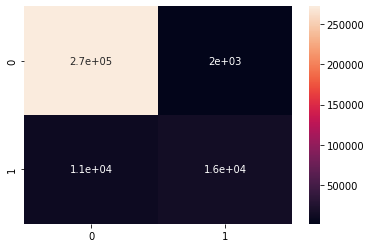

In [ ]:
# Matriz de Confusão
sns.heatmap(confusion_matrix(test_y, lr.predict(test_x)), annot=True);

Da matriz de confusão da Regressão Logística, observamos o seguinte:


*   Alto valor para *true positive* (270000);
*   Valor cerca de 10 vezes menor para *true negative* (16000);
*   Valor de *false positive* é da ordem de 1800 casos;
*   Valor de *false negative* é cerca de 11000 casos;

Aparentemente, mesmo sem o balanceamento dos dados, o modelo de Regressão Logística apresenta resultados satisfatórios.

### 3.1.2. K-Nearest Neighbors (KNN):

In [ ]:
# KNN - n = 3
knn_3 = KNeighborsClassifier(n_neighbors = 3)
knn_3.fit(train_x, train_y)

# Saída
print(classification_report(test_y, knn_3.predict(test_x)))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    273871
         1.0       0.89      0.93      0.91     26129

    accuracy                           0.98    300000
   macro avg       0.94      0.96      0.95    300000
weighted avg       0.98      0.98      0.98    300000



In [ ]:
# KNN - n = 5
knn_5 = KNeighborsClassifier(n_neighbors = 5)
knn_5.fit(train_x, train_y)

# Saída
print(classification_report(test_y, knn_5.predict(test_x)))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    273871
         1.0       0.88      0.93      0.90     26129

    accuracy                           0.98    300000
   macro avg       0.94      0.96      0.95    300000
weighted avg       0.98      0.98      0.98    300000



Não foi observado grandes mudanças para n = 3 e n = 5. Em ambos, os parâmetros analisados possuem alto valor tanto para os dados não fraudulentos como para os fraudulentos.

Para saber se o modelo realmente está funcionando bem, será analisada a matriz de confusão da KNN, para 5 vizinhos.

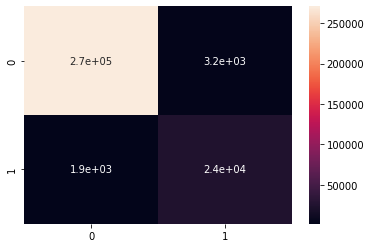

In [ ]:
# Matriz de Confusão - n = 5
sns.heatmap(confusion_matrix(test_y, knn_5.predict(test_x)), annot=True);

Da matriz de confusão da KNN, observamos o seguinte:


*   Alto valor para *true positive* (270000);
*   Valor de 24000 para *true negative*;
*   Valor de *false positive* é 2000;
*   Valor de *false negative* é cerca de 3100 casos;

A KNN também apresenta resultados satisfatórios, porém melhores do que a Regressão Logística.

### 3.1.3. Árvore de Decisão (Decision Tree):

In [ ]:
# Decision Tree:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_x, train_y)

# Saída
print(classification_report(test_y, dt.predict(test_x)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273871
         1.0       1.00      1.00      1.00     26129

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



Já a Árvore de Decisão parece apresentar resultados perfeitos, com todos os parâmetros em 100%. Infelizmente, sabemos que em *Machine Learning*, ótimos parâmetros não nos retornam bons modelos.

Para completar a análise, vamos verificar a matriz de confusão.

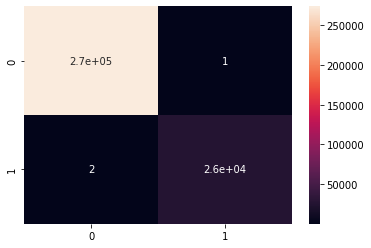

In [ ]:
# Matriz de Confusão
sns.heatmap(confusion_matrix(test_y, dt.predict(test_x)), annot=True);

De acordo com a matriz de confusão da Árvore de Decisão, este modelo é perfeito para os dados analisados.

## 3.2. Análise Balanceada:

No terceiro *notebook* estudado, o usuário fez uso da técnica de SMOTE (Synthetic Minority Over-sampling TEchnique), que é uma técnica de processamento ideal para *datasets* com dados desbalanceados.

In [ ]:
# Importando a biblioteca SMOTE
from imblearn.over_sampling import SMOTE

In [ ]:
# Definindo os dados de treinamento (70%) e de teste (30%)
sm = SMOTE(random_state = 42)
X_train_smote, y_train_smote = sm.fit_resample(train_x, train_y)

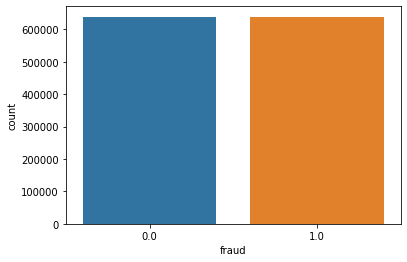

In [ ]:
# Verificando se os dados estão balanceados
sns.countplot(x = y_train_smote)

Com nossos dados balanceados, será feita uma nova divisão dos dados de treinamento e de teste.

In [ ]:
# Definindo os novos dados de treinamento (70%) e de teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, random_state=42, test_size = 0.3)

Vamos verificar agora os modelos treinados na seção anterior com os dados balanceados.

### 3.2.1. Modelo de Regressão Logística:

In [ ]:
# Regressão Logística
lr_s = LogisticRegression()
lr_s.fit(X_train, y_train)

# Saída
print(classification_report(y_test, lr_s.predict(X_test)))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94    191636
         1.0       0.93      0.95      0.94    191600

    accuracy                           0.94    383236
   macro avg       0.94      0.94      0.94    383236
weighted avg       0.94      0.94      0.94    383236



Comparando com o mesmo modelo sem balanceamento (seção 3.1.1) é possível notar uma melhora significativa, com precisão de 93% contra os 89% dos dados fraudulentos. Já no *recall* e no f1-*score*, a melhora foi ainda mais notável.

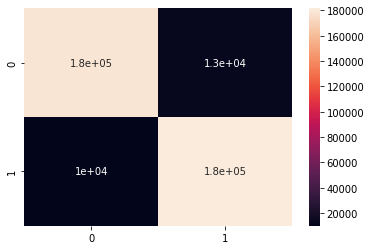

In [ ]:
# Matriz de Confusão
sns.heatmap(confusion_matrix(y_test, lr_s.predict(X_test)), annot=True);

Da matriz de confusão da Regressão Logística Balanceada, observamos o seguinte:


*   Alto valor para *true positive* (180000);
*   Valor cerca de 10 vezes menor para *true negative* (180000);
*   Valor de *false positive* é da ordem de 10000 casos;
*   Valor de *false negative* é cerca de 13000 casos;

Aparentemente, o modelo de Regressão Logística Balanceado apresenta melhora significativa em relação à análise desbalanceada, mesmo que os resultados sejam satisfatórios.

### 3.2.2. K-Nearest Neighbors (KNN):

In [ ]:
# KNN - n = 5
knn_5_s = KNeighborsClassifier(n_neighbors = 5)
knn_5_s.fit(X_train, y_train)

# Saída
print(classification_report(y_test, knn_5_s.predict(X_test)))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98    191636
         1.0       0.97      1.00      0.98    191600

    accuracy                           0.98    383236
   macro avg       0.98      0.98      0.98    383236
weighted avg       0.98      0.98      0.98    383236



Já o KNN Balanceado com 5 vizinhos apresentou valores altíssimos para ambos os casos. Até esta parte do trabalho, este parece ser o modelo com melhor treinamento.

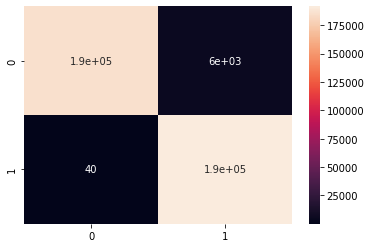

In [ ]:
# Matriz de Confusão - n = 5
sns.heatmap(confusion_matrix(y_test, knn_5_s.predict(X_test)), annot=True);

Da matriz de confusão da KNN Balanceada, observamos o seguinte:


*   Alto valor para *true positive* (190000);
*   Valor de 190000 para *true negative*;
*   Valor de *false positive* é 40, valor extremamente baixo;
*   Valor de *false negative* é cerca de 6000 casos;

A KNN Balanceada apresentou resultados muito bons, porém o modelo de Árvore de Decisão (desbalanceado) se mostrou mais eficaz.

### 3.2.3. Árvore de Decisão (Decision Tree):

In [ ]:
# Decision Tree:
dt_s = DecisionTreeClassifier(random_state = 42)
dt_s.fit(X_train, y_train)

# Saída
print(classification_report(y_test, dt_s.predict(X_test)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    191636
         1.0       1.00      1.00      1.00    191600

    accuracy                           1.00    383236
   macro avg       1.00      1.00      1.00    383236
weighted avg       1.00      1.00      1.00    383236



Por fim, a Árvore de Decisão Balanceada parece ser perfeita, com 100% de precisão, *recall* e f1-*score* para ambos os casos.

Verificando sua matriz de confusão, temos:

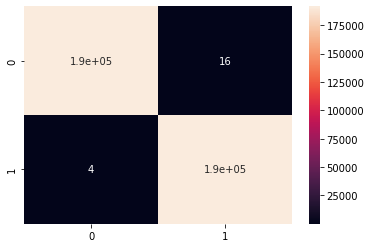

In [ ]:
# Matriz de Confusão
sns.heatmap(confusion_matrix(y_test, dt_s.predict(X_test)), annot=True);

Da matriz de confusão da Árvore de Decisão Balanceada, observamos o seguinte:


*   Alto valor para *true positive* (190000);
*   Valor de 190000 para *true negative*;
*   Valor de *false positive* é 4, valor extremamente baixo;
*   Valor de *false negative* é cerca de 16 casos;

Novamente, a Árvore de Decisão mostrou-se um modelo muito bom para o caso estudado.

Comparando agora os modelos de Árvore de Decisão Desbalanceado (IDT) e Árvore de Decisão Balanceado (BDT), temos que:


*   A IDT apresenta menos casos de *false positive* e *false negative*;
*   A BDT apresenta mais casos de *true negative*;



# 4. Conclusões:

Algumas conclusões ao longo do estudo dos modelos:

*   Na análise feita neste trabalho verificou-se que o modelo que apresenta melhores resultados é a Árvore de Decisão;

*   Comparando nossa análise com a análise feita no primeiro *notebook* (Regressão Logística desbalanceado), foi possível verificar que a quantidade de *false negative* e *false positive* é alta, o que não é vantajoso no problema de fraudes em cartões;

*   O uso do SMOTE, como feito no segundo *notebook* é uma técnica de *oversampling* muito interessante e que traz grandes vantagens aos modelos analisados. Seria interessante estudar outras técnicas, como as de *undersampling* neste problema;

*   Assim como o terceiro *notebook*, também foram estudados três modelos (neste trabalho: Regressão Logística, KNN e Árvore de Decisão; no terceiro *notebook*: DNN, SVM e Árvore de Decisão), e o autor também chegou à mesma conclusão: a Árvore de Decisão é um modelo excelente nesta análise;

# 5. Referências Bibliográficas:

[1]https://www1.folha.uol.com.br/mercado/2021/08/compras-online-com-cartao-crescem-465-no-2o-trimestre-e-atingem-r-1351-bilhoes.shtml

[2] https://www.insper.edu.br/noticias/como-a-pandemia-mudou-o-comportamento-dos-consumidores/

[3]https://www.gazetadopovo.com.br/bomgourmet/negocios-e-franquias/compras-online-alimentos-bebidas/

[4]https://www.ecommercebrasil.com.br/noticias/segundo-pesquisa-brasil-e-1o-no-ranking-mundial-de-crescimento-das-compras-online

[5]https://mundoconectado.com.br/noticias/v/27527/1-em-cada-3-brasileiros-ja-foi-vitima-de-fraude-com-cartao-de-credito

[6] Nguyen, T. T., Tahir, H., Abdelrazek, M., & Babar, A. (2020). Deep learning methods for credit card fraud detection. arXiv preprint arXiv:2012.03754.

[7] Dornadula, V. N., & Geetha, S. (2019). Credit card fraud detection using machine learning algorithms. Procedia computer science, 165, 631-641.

[8] John, H., & Naaz, S. (2019). Credit card fraud detection using local outlier factor and isolation forest. Int. J. Comput. Sci. Eng, 7(4), 1060-1064.

[9] https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud?resource=download